## Librerias

In [1]:
import pandas as pd
import numpy as np
import urllib.request
from PIL import Image
from sklearn.neighbors import KNeighborsTransformer, KNeighborsRegressor
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

## Data

In [2]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
train = pd.read_csv("../data/processed/train.csv")


## Data exploration

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         909 non-null    int64  
 1   Company           909 non-null    object 
 2   Product           909 non-null    object 
 3   TypeName          909 non-null    object 
 4   Inches            909 non-null    float64
 5   Resolution_X      909 non-null    int64  
 6   Resolution_Y      909 non-null    int64  
 7   cat_resolution    909 non-null    object 
 8   Is_touch          909 non-null    int64  
 9   CPU_Brand         909 non-null    object 
 10  CPU_Model         909 non-null    object 
 11  SSD               909 non-null    float64
 12  HDD               909 non-null    int64  
 13  CPU_Frec          909 non-null    float64
 14  Ram               909 non-null    float64
 15  GPU_Brand         909 non-null    object 
 16  GPU_Model         909 non-null    object 
 1

In [4]:
train.head()

,laptop_ID,Company,Product,TypeName,Inches,Resolution_X,Resolution_Y,cat_resolution,Is_touch,CPU_Brand,...,SSD,HDD,CPU_Frec,Ram,GPU_Brand,GPU_Model,Is_GPU_dedicated,OpSys,Weight,Price_euros
0,1223,Dell,Inspiron 5567,Notebook,15.6,1920,1080,Full HD,0,Intel,...,256.0,0,2.5,8.0,AMD,Radeon R7 M445,1,Windows,2.36,889.0
1,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,1920,1080,Full HD,0,Intel,...,0.0,2048,2.5,8.0,Intel,HD Graphics 620,0,Chrome OS,2.20,519.0
2,1267,Dell,XPS 13,Convertible,13.3,3200,1800,QHD,1,Intel,...,256.0,0,1.2,8.0,Intel,HD Graphics 615,0,Windows,1.24,1813.0
3,161,Dell,Inspiron 5579,Convertible,15.6,1920,1080,Full HD,1,Intel,...,256.0,0,1.8,8.0,Intel,UHD Graphics 620,0,Windows,1.56,1049.0
4,922,LG,Gram 14Z970,Ultrabook,14.0,1920,1080,Full HD,1,Intel,...,512.0,0,2.7,8.0,Intel,HD Graphics 620,0,Windows,0.98,1899.0


## Data processing

In [5]:
# train = train[['laptop_ID','Inches','Price_euros']]
train = train[['SSD', 'Ram','CPU_Frec', 'Price_euros']]

In [6]:
train

,SSD,Ram,CPU_Frec,Price_euros
0,256.0,8.0,2.5,889.00
1,0.0,8.0,2.5,519.00
2,256.0,8.0,1.2,1813.00
3,256.0,8.0,1.8,1049.00
4,512.0,8.0,2.7,1899.00
...,...,...,...,...
904,256.0,4.0,2.9,399.00
905,640.0,14.0,2.2,1799.00
906,256.0,14.0,2.8,1537.39
907,128.0,8.0,2.5,989.00


In [7]:
# df.to_csv("Dataset/limpio.csv")

-----------------------------------------------------------------------------------------------------------------

## Pasos que si o si debéis realizar para poder participar en la competición:

### 1. Definir X e y

In [8]:
X = train.drop(['Price_euros'], axis=1)
y = train['Price_euros'].copy()
X.shape

(909, 3)

In [9]:
y = np.log(y)

In [10]:
y.shape

(909,)

### 2. Dividir X_train, X_test, y_train, y_test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
X_train

,SSD,Ram,CPU_Frec
84,0.0,4.0,2.0
10,256.0,8.0,2.5
617,256.0,14.0,2.8
250,0.0,8.0,2.7
870,256.0,8.0,2.5
...,...,...,...
106,0.0,8.0,1.6
270,0.0,8.0,2.5
860,0.0,4.0,1.6
435,256.0,8.0,1.2


### 3. Asignar el modelo (vacío) a una variable


In [14]:
regressor = LinearRegression()

regressor.fit(X_train_scaled, y_train)

LinearRegression()

<Axes: ylabel='Frequency'>

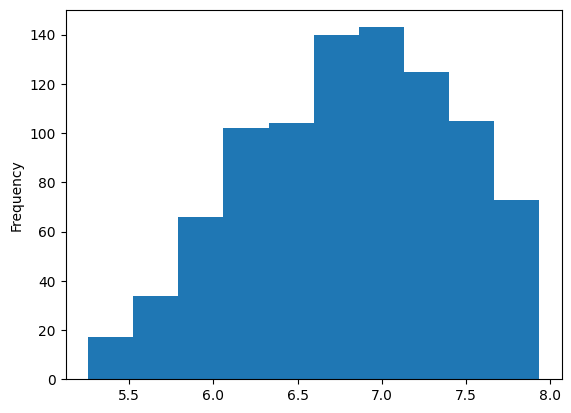

In [15]:
y.plot(kind='hist')

### 4. Sacar métricas, valorar el modelo 

Recuerda que en la competición se va a evaluar con la métrica de RMSE.

In [ ]:
from sklearn.metrics import root_mean_squared_error

predictions = regressor.predict(X_test_scaled)

rmse = root_mean_squared_error(y_test, predictions)

In [17]:
print(rmse)

0.3827922062842123


_____________________

KNN

In [6]:
X = train.drop(['Price_euros'], axis=1)
y = train['Price_euros'].copy()

In [7]:
y = np.log(y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [23]:
y_pred = knn.predict(X_test_scaled)
y_test_original = np.exp(y_test)
y_pred_original = np.exp(y_pred)
rmse = root_mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

In [24]:
print(f'RMSE:',rmse)
print(f'r2:', r2)

RMSE: 431.84455883537834
r2: 0.5784027436997415


___________________________

In [27]:
X_train_scaled_full = scaler.transform(X)
predictions_submit = regressor.predict(X_train_scaled_full)
predictions_submit_original = np.exp(predictions_submit)

X_pred_processed = X_pred[['SSD', 'Ram','CPU_Frec']]
X_pred_scaled = scaler.transform(X_pred_processed)
new_predictions = regressor.predict(X_pred_scaled)
new_predictions_original = np.exp(new_predictions)

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir con el dataset de predicción 

Definición de **modelo que está listo**. 

Tras hacer suficientes pruebas, analizar los datos, hacer feature engineering, probar diferentes modelos con diferentes parámetros, es con este con el que observo mejores métricas y menos overfitting. ¡Cuidado con el overfitting aquí! Si vuestro modelo aprende muy bien de estos datos pero hay overfitting cuando le pasemos los datos desconocidos de `test.csv` nos arriesgamos a que digamos, no salga lo esperado.

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `train.csv` al completo.


**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 2. Carga los datos de `test.csv` para predecir.

In [18]:
X_pred = pd.read_csv("../data/processed/test.csv")
X_pred.head()

,laptop_ID,Company,Product,TypeName,Inches,Resolution_X,Resolution_Y,cat_resolution,Is_touch,CPU_Brand,CPU_Model,SSD,HDD,CPU_Frec,Ram,GPU_Brand,GPU_Model,Is_GPU_dedicated,OpSys,Weight
0,539,Asus,Zenbook UX510UW-FI095T,Notebook,15.6,3840,2160,4K UHD,0,Intel,Core i7 7500U,256.0,1024,2.70,8.0,Nvidia,GeForce GTX 960M,1,Windows,2.00
1,327,Asus,ZenBook UX410UA-GV183T,Notebook,14.0,1920,1080,Full HD,0,Intel,Core i7 7500U,256.0,0,2.70,8.0,Intel,HD Graphics 620,0,Windows,2.00
2,563,Mediacom,SmartBook 130,Notebook,13.3,1920,1080,Full HD,0,Intel,Atom x5-Z8350,0.0,0,1.44,4.0,Intel,HD Graphics,0,Windows,1.35
3,13,Apple,MacBook Pro,Ultrabook,15.4,2880,1800,QHD,0,Intel,Core i7,256.0,0,2.80,14.0,AMD,Radeon Pro 555,1,macOS,1.83
4,935,HP,EliteBook 850,Ultrabook,15.6,1920,1080,Full HD,0,Intel,Core i7 6500U,256.0,0,2.50,8.0,AMD,Radeon R7 M365X,1,Windows,1.84


In [19]:
X_pred.shape

(391, 20)

**¿Por qué da error?** 

In [22]:
predictions_submit = regressor.predict(X_train)
predictions_submit

c:\Users\Felipe\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-D1404OgA-py3.11\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([  8.19911608,  63.17758234,  64.86059334,   9.39628604,
        63.17758234,  63.22267992,  63.17758234,  10.9411924 ,
         8.24421366,  63.16254982,  63.04228962,  62.6316112 ,
        36.13660895,   8.06382336,   8.24421366, 118.65692217,
       145.57763537,  35.72593052,   9.39628604,   8.19911608,
        64.89065839,   8.27427871,   8.22918113,   9.36622099,
        63.07235467,  63.04228962,  64.86059334,  63.20764739,
        63.22267992,  36.31699924, 118.62685712, 117.01900874,
        62.01047744,   9.23092827,  63.20764739,   9.15576565,
         8.34944133,  63.17758234,  61.95034734,  63.20764739,
        63.17758234,  11.03419947,  64.86059334,  62.01047744,
       145.56260285,  37.95491267, 116.88371602,  63.22267992,
        63.07235467,   7.5689628 ,  14.79024353,   8.06382336,
        63.17758234,  64.86059334,  63.14751729,  63.22267992,
        63.19261487,  62.98215952,  62.967127  , 118.65692217,
         8.19911608,   7.59301484,   9.44138361,  63.17

IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 391 FILAS, SI O SI

**Entonces, si al cargar los datos de train usé `index_col=0` para que utilizara la primera columna del conjunto de datos como índice, ¿tendré que hacerlo también para el conjunto `test.csv`?**

In [19]:
# ¿Qué opináis?
# Sí

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

In [20]:
# X_pred = pd.read_csv("Dataset/test.csv")
# X_pred.head()

In [23]:
X_pred = X_pred[['SSD', 'Ram','CPU_Frec']]
X_pred

,SSD,Ram,CPU_Frec
0,256.0,8.0,2.70
1,256.0,8.0,2.70
2,0.0,4.0,1.44
3,256.0,14.0,2.80
4,256.0,8.0,2.50
...,...,...,...
386,256.0,8.0,2.50
387,256.0,8.0,1.60
388,256.0,6.0,2.50
389,256.0,8.0,2.30


### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

In [41]:
predictions_submit = regressor.predict(X_pred)
predictions_submit = np.exp(predictions_submit)

c:\Users\Felipe\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-D1404OgA-py3.11\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [42]:
predictions_submit

array([2.82314040e+27, 2.82314040e+27, 3.34403669e+03, 1.47434045e+28,
       2.73952578e+27, 3.74876276e+03, 1.47434045e+28, 6.27976116e+03,
       5.78033346e+50, 3.80554182e+03, 2.65838763e+27, 1.64829594e+63,
       3.63773343e+03, 3.63773343e+03, 5.91932751e+15, 2.99971911e+16,
       1.63050850e+06, 5.65831006e+15, 1.47434045e+28, 3.42544266e+03,
       3.64341154e+04, 2.73952578e+27, 3.40444669e+51, 3.92169292e+03,
       1.65846134e+15, 1.89872572e+15, 1.20435682e+04, 1.43067404e+28,
       2.73952578e+27, 5.09315561e+15, 2.97364867e+51, 2.46590076e+27,
       3.17741535e+03, 3.30361518e+51, 5.83101055e+15, 3.42544266e+03,
       5.91932751e+15, 1.47434045e+28, 1.20435682e+04, 2.65838763e+27,
       2.86589991e+27, 2.78101886e+27, 2.86589991e+27, 2.78101886e+27,
       1.22259811e+04, 1.02080129e+04, 9.91045502e+26, 1.69860451e+63,
       1.05195775e+04, 1.89872572e+15, 3.86318087e+03, 1.13407299e+04,
       9.19286500e+26, 3.63773343e+03, 2.73952578e+27, 1.95468106e+03,
      

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [24]:
from pathlib import Path
import os
import sys
root_path = Path(os.getcwd()).resolve().parent
root_path
sys.path.append(str(root_path))

In [32]:
sample = pd.read_csv("../data/raw/sample_submission.csv")

In [33]:
sample.head()

,laptop_ID,Price_euros
0,539,650
1,327,650
2,563,650
3,13,650
4,935,500


In [34]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [39]:
submission = pd.DataFrame({"laptop_ID": sample['laptop_ID'], "Price_euros": predictions_submit})

In [40]:
submission.head()

,laptop_ID,Price_euros
0,539,2.823140e+27
1,327,2.823140e+27
2,563,3.344037e+03
3,13,1.474340e+28
4,935,2.739526e+27


In [30]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [31]:
def chequeator(df_to_submit,version):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit['laptop_ID'].all() == sample['laptop_ID'].all():
                print("You're ready to submit!")
                submission.to_csv(f"submission_{version}.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [32]:
chequeator(submission,10)

You're ready to submit!


URLError: <urlopen error [Errno 11001] getaddrinfo failed>